In [1]:
import pandas as pd
import numpy as np

```
변수 설명
음식명max: 최대치
음식명recent: 최근치(실제값)
음식명recent2: 최근치(최대치와 같은 방법으로 집계, 최대치보다 언제나 작거나 같음)
전체recent: 해당 지역 모든 음식점의 최근 수
음식명minDate: 최소치를 찍은 날짜
음식명maxDate: 최대치를 찍은 날짜
```

In [2]:
# 전체 데이터 가져오기
df = pd.read_csv('전체_임시.csv', encoding='euc-kr')
df.head(3)

/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_7266/4088744562.py:2: DtypeWarning: Columns (145,147,154,155,166,168,173,174,176,177,178,179,182,184,191,192,203,205,210,211,213,214,215,216) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('전체_임시.csv', encoding='euc-kr')


,광역,시군구,읍면동,마라recent,탕후루recent,카스테라recent,떡볶이recent,포케recent,양꼬치recent,곱창recent,...,40대여자,50대남자,50대여자,60대남자,60대여자,70세이상남자,70세이상여자,인구,남자인구,여자인구
0,강원특별자치도,강릉시,교동,2.0,2.0,0.0,6.0,0.0,3.0,4.0,...,2498.0,3027.0,2952.0,2364.0,2619.0,1879.0,2692.0,32078.0,15695.0,16383.0
1,강원특별자치도,강릉시,금학동,4.0,1.0,0.0,3.0,0.0,0.0,0.0,...,3.0,12.0,23.0,19.0,23.0,23.0,34.0,193.0,91.0,102.0
2,강원특별자치도,강릉시,주문진읍,3.0,2.0,0.0,0.0,0.0,1.0,3.0,...,834.0,1412.0,1305.0,1727.0,1875.0,1572.0,2411.0,15653.0,7654.0,7999.0


In [3]:
# 지역명 변경 ex : 전북특별자치도 > 전라북도
area = {'전북특별자치도':'전라북도'}

df['광역'] = df['광역'].replace(area)
df['광역'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [4]:
# 각 컬럼의 데이터 타입에 따라 NaN 값 처리
def get_NaN(df):

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0).astype(float)
        elif pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].fillna('')
        else:
            # 기타 데이터 타입의 경우에도 적절히 처리 (필요시)
            df[col] = df[col].fillna('')

    return df

In [5]:
get_NaN(df)
df.isna().sum()

광역           0
시군구          0
읍면동          0
마라recent     0
탕후루recent    0
            ..
70세이상남자      0
70세이상여자      0
인구           0
남자인구         0
여자인구         0
Length: 237, dtype: int64

In [6]:
# 인구수 컬럼을 각 가게 'recent' 컬럼으로 나누는 함수
def get_population_store(df, population_column='인구', new_col_suffix=' 인구당 가게 수'):

    # 'recent'로 끝나는 컬럼들만 선택
    store_columns = [col for col in df.columns if 'recent' in col]
    
    # 모든 '당 인구수' 컬럼이 0인 행들을 제외
    df_new = df[~(df[store_columns] == 0).all(axis=1)].copy()
    
    # 새로운 데이터프레임 생성
    df_pca = df_new[['광역', '시군구', '읍면동']].copy()
    
    # 각 가게 수 컬럼에 대해 인구당 가게 수 계산
    for col in store_columns:
        # 새로운 컬럼 이름 생성 (예: '마라recent 인구당 가게 수')
        new_col_name = col + new_col_suffix
        
        # 새로운 컬럼에 인구 수를 가게 수로 나눈 값을 할당
        df_pca[new_col_name] = df_new[population_column] / df_new[col]
        
        # 무한대 값을 NaN으로 대체
        df_pca[new_col_name] = df_pca[new_col_name].replace([np.inf, -np.inf], np.nan)
        
        # NaN 값을 0으로 대체
        df_pca[new_col_name] = df_pca[new_col_name].fillna(0)
        
        # 소수점 3자리로 반올림
        df_pca[new_col_name] = df_pca[new_col_name].round(1)

    return df_pca

In [7]:
df_pca = get_population_store(df)
df_pca.head(2)

,광역,시군구,읍면동,마라recent 인구당 가게 수,탕후루recent 인구당 가게 수,카스테라recent 인구당 가게 수,떡볶이recent 인구당 가게 수,포케recent 인구당 가게 수,양꼬치recent 인구당 가게 수,곱창recent 인구당 가게 수,...,냉면recent 인구당 가게 수,꼬치recent 인구당 가게 수,추어탕recent 인구당 가게 수,닭갈비recent 인구당 가게 수,오리recent 인구당 가게 수,비어recent 인구당 가게 수,아구찜recent 인구당 가게 수,한우recent 인구당 가게 수,삼겹살recent 인구당 가게 수,전체recent 인구당 가게 수
0,강원특별자치도,강릉시,교동,16039.0,16039.0,0.0,5346.3,0.0,10692.7,8019.5,...,10692.7,5346.3,10692.7,3564.2,32078.0,10692.7,16039.0,4009.8,0.0,38.1
1,강원특별자치도,강릉시,금학동,48.2,193.0,0.0,64.3,0.0,0.0,0.0,...,0.0,0.0,0.0,64.3,0.0,0.0,0.0,0.0,0.0,1.7


## 1. PCA, Clustering

In [9]:
import matplotlib.pyplot as plt
import set_matplotlib_hangul # 한글 꺠짐방지 모듈
from adjustText import adjust_text # 글자 안 겹치게 자동 조정 모듈
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Hangul OK in your MAC!


In [10]:
def get_PCA(df):
    # 끝에 ' 인구당 가게 수'가 들어간 컬럼들만 선택
    column = [col for col in df.columns if ' 인구당 가게 수' in col and col != '전체recent 인구당 가게 수']

    # 모든 ' 인구당 가게 수' 컬럼이 0인 행들을 제외
    df_filtered = df[~(df[column] == 0).all(axis=1)]
    
    # 숫자형 데이터만 선택 (PCA는 숫자형 데이터에만 적용 가능)
    df_numeric = df_filtered[column].select_dtypes(include=[float, int])

    # 광역, 시군구, 읍면동 컬럼을 선택
    df_metadata = df_filtered[['광역', '시군구', '읍면동']].reset_index(drop=True)

    # 스케일링 (표준화)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_numeric)

    # PCA 수행
    pca = PCA(n_components=2)  # 주성분 2개로 축소
    pca_result = pca.fit_transform(scaled_data)

    # 결과를 데이터프레임으로 변환
    df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
    df_pca = pd.concat([df_metadata, df_numeric.reset_index(drop=True), df_pca], axis=1)

    
    return df_pca

In [11]:
df_pca_original = get_PCA(df_pca)
df_pca_original.head(2)

,광역,시군구,읍면동,마라recent 인구당 가게 수,탕후루recent 인구당 가게 수,카스테라recent 인구당 가게 수,떡볶이recent 인구당 가게 수,포케recent 인구당 가게 수,양꼬치recent 인구당 가게 수,곱창recent 인구당 가게 수,...,꼬치recent 인구당 가게 수,추어탕recent 인구당 가게 수,닭갈비recent 인구당 가게 수,오리recent 인구당 가게 수,비어recent 인구당 가게 수,아구찜recent 인구당 가게 수,한우recent 인구당 가게 수,삼겹살recent 인구당 가게 수,PC1,PC2
0,강원특별자치도,강릉시,교동,16039.0,16039.0,0.0,5346.3,0.0,10692.7,8019.5,...,5346.3,10692.7,3564.2,32078.0,10692.7,16039.0,4009.8,0.0,7.333094,0.504744
1,강원특별자치도,강릉시,금학동,48.2,193.0,0.0,64.3,0.0,0.0,0.0,...,0.0,0.0,64.3,0.0,0.0,0.0,0.0,0.0,-2.846053,0.996077


## 1. 특정 가게의 인구대비 비율 PCA
- 인구수 컬럼을 각 최근값 가게컬럼 들로 나눈 후 진행
- 특정 가게 종류의 분포 파악: 각 가게 컬럼을 사용

## 2. PCA 클러스터링 시각화
- 목적: 지역을 PCA를 통해 차원 축소하고 KMeans 클러스터링을 통해 비슷한 패턴을 가지는 지역들을 그룹화
- 높은 PCA1과 PCA2 값을 갖는 지역은 특정 가게의 비율이 매우 높음을 나타냄
- 특정 가게 유형이 특정 지역에서 인구당 가게 수가 높다는 것은 그 가게 유형이 그 지역에서 인기가 많고, 수요가 높다는 것을 의미

## 3. 클러스터링 결과 : 
- 보라색 (클러스터 0): 이 클러스터는 PC1과 PC2가 낮은 값들을 포함, 즉, 이 클러스터에 속하는 지역들은 대부분의 음식점 유형에서 특별한 특성을 보이지 않거나 평균적인 특성을 가질 수 있음
- 파란색 (클러스터 1): 이 클러스터는 보라색 클러스터보다 약간 높은 PC1과 PC2 값을 가짐 특정 음식점 유형에서 평균보다 높은 특성임
- 녹색 (클러스터 2): 이 클러스터는 PC1이 낮고 PC2가 높은 값을 가진다. 특정 지역에서 음식점 유형의 특정 패턴을 가지고 있을 가능성이 큼
- 노란색 (클러스터 3): 이 클러스터는 PC1과 PC2 값이 높은 지역들을 포함. 즉, 이 클러스터에 속하는 지역들은 특정 음식점 유형에서 매우 높은 비율을 보이며, 다른 지역과 비교해 독특한 특성을 가질 가능성이 큼

In [12]:
from sklearn.cluster import KMeans
# 클러스터링 함수
def get_clustering(df_pca, n_clusters=3):
    # KMeans 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pca[['PC1', 'PC2']])
    
    # 클러스터 결과를 데이터프레임에 추가
    df_pca['Cluster'] = clusters
    return df_pca

df_pca_original = get_clustering(df_pca_original, n_clusters=4) # n_clusters는 분석 상황에 맞춰 조정 가능

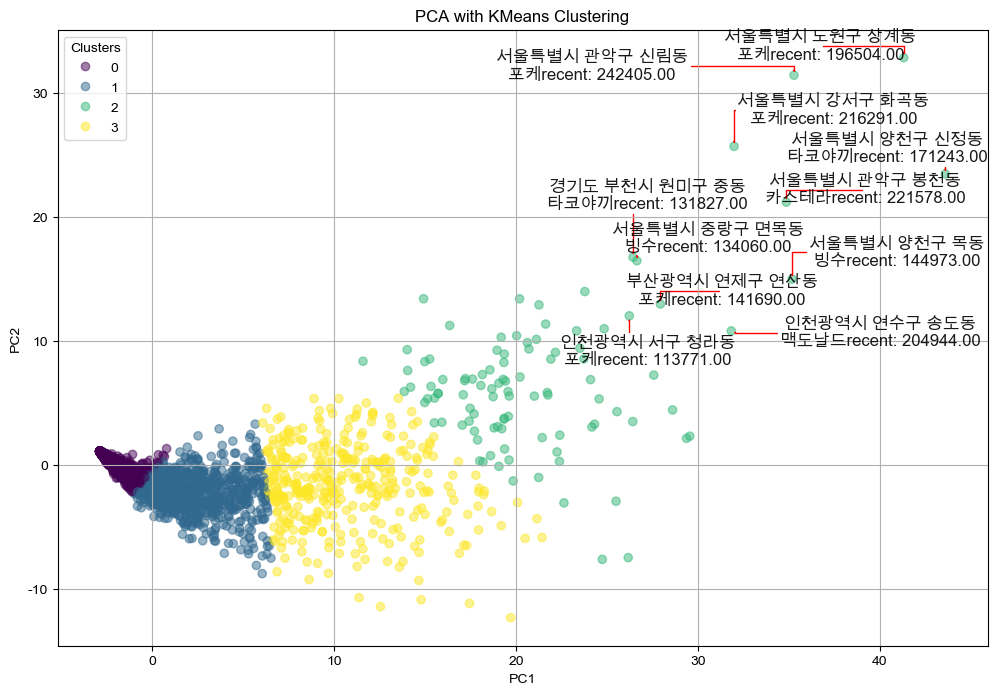

In [41]:
# 끝에 ' 인구당 가게 수'가 들어간 컬럼들만 선택
column = [col for col in df_pca_original.columns if ' 인구당 가게 수' in col and col != '전체recent 인구당 가게 수']


# 클러스터링 시각화 함수
def plot_clusters(df_pca, columns):
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
    
    # 특정 조건에 맞는 점들에만 텍스트 추가
    texts = []
    for i in range(len(df_pca)):
        if df_pca['PC1'][i] >= 25 and df_pca['PC2'][i] > 10:
            txt = f"{df_pca['광역'][i]} {df_pca['시군구'][i]} {df_pca['읍면동'][i]}"
            max_store_col = columns[np.argmax(df_pca[columns].iloc[i])]
            max_store_value = df_pca[max_store_col].iloc[i]
            if max_store_value > 0:
                txt += f"\n{max_store_col.split()[0]}: {max_store_value:.2f}"
            texts.append(plt.text(df_pca['PC1'][i], df_pca['PC2'][i], txt, fontsize=12, alpha=0.9))
    adjust_text(texts, arrowprops=dict(arrowstyle='-|>', color='red', connectionstyle='angle,angleA=0,angleB=90,rad=0'))
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA with KMeans Clustering')
    plt.legend(*scatter.legend_elements(), title='Clusters', loc='upper left')
    plt.grid()
    plt.show()

# 클러스터링 결과 시각화
plot_clusters(df_pca_original, column)

In [16]:
# 인구당 가게 수 컬럼만 추출
column_recent = [col for col in df_pca_original.columns if ' 인구당 가게 수' in col and col != '전체recent 인구당 가게 수']

# 각 지역별로 최대값을 가진 행 찾음
df_pca_region_max = df_pca_original.groupby(['광역', '시군구', '읍면동'])[column].idxmax()

# df_pca_region_max는 인덱스를 반환하므로 이를 기반으로 원본 데이터에서 행을 선택
top_stores = df_pca_original.loc[df_pca_region_max.values.flatten()]

# 각 지역별로 인구당 가게 수가 가장 많은 가게 유형과 그 수를 추출
top_stores['Top Store Type'] = top_stores[column].idxmax(axis=1)
top_stores['Top Store Count'] = top_stores[column].max(axis=1)

# 데이터프레임 재구성
df_pca_barplot = top_stores[['광역', '시군구', '읍면동', 'Top Store Type', 'Top Store Count']].drop_duplicates()
df_pca_barplot.sort_values(by='Top Store Count', ascending=False, inplace=True)

df_pca_barplot.head(3)

,광역,시군구,읍면동,Top Store Type,Top Store Count
667,서울특별시,관악구,신림동,포케recent 인구당 가게 수,242405.0
666,서울특별시,관악구,봉천동,카스테라recent 인구당 가게 수,221578.0
664,서울특별시,강서구,화곡동,포케recent 인구당 가게 수,216291.0


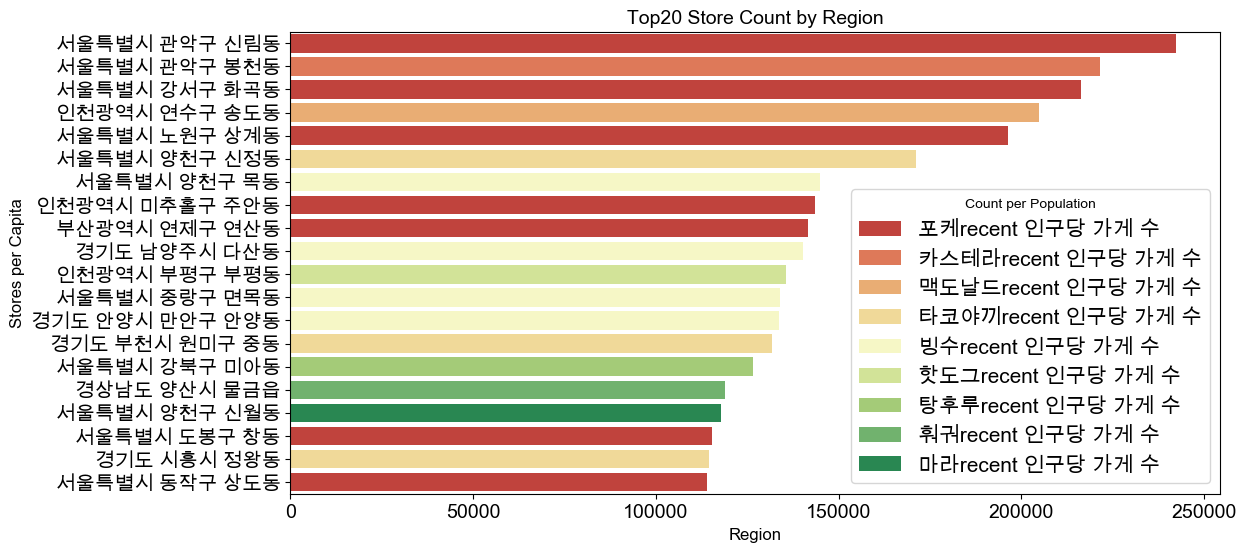

In [44]:
import seaborn as sns

# 지역 정보를 포함하는 새로운 열 생성
df_pca_barplot['지역'] = df_pca_barplot['광역'] + ' ' + df_pca_barplot['시군구'] + ' ' + df_pca_barplot['읍면동']
df_pca_Top_barplot = df_pca_barplot.sort_values(by='Top Store Count', ascending=False).head(20)
df_pca_Top_barplot

def draw_barplot_store(df):

    # 그래프 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Top Store Count', y='지역', hue='Top Store Type', data=df, palette='RdYlGn')
    plt.title('Top20 Store Count by Region', fontsize=14)
    plt.xlabel('Region', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Stores per Capita', fontsize=12)
    plt.legend(title='Count per Population', loc='lower right', prop={'size': 15})
    # plt.xticks(rotation=90) # 글자 안 겹치면 필요없음
    plt.show()

# 함수 적용
draw_barplot_store(df_pca_Top_barplot)

In [ ]:
# 지역별 특정 가게 유형
def get_max_store_type(df):
    # 'recent'으로 끝나는 컬럼들을 선택, '전체recent'는 제외
    column_recent = [col for col in df.columns if 'recent' in col and col != '전체recent']
    
    # 각 지역별로 그룹바이하고 가게 수가 0인 행들은 제외
    df_filtered = df[df[column_recent].sum(axis=1) != 0]
    
    # 각 지역별로 가게 유형 중 최대 값을 가진 컬럼과 그 값을 찾음
    max_store = df_filtered[column_recent].idxmax(axis=1)
    
    # 결과 데이터프레임 생성
    result = df_filtered[['광역', '시군구', '읍면동', '전체recent']].copy()
    result['최다 가게'] = max_store

    # 시각화를 그리기 위해 광역, 시군구, 읍면동 합침
    result['주소'] = result['광역'] + ' ' + result['시군구'] + ' ' + result['읍면동']
    # 컬럼 순서 재배치
    result = result[['주소', '광역', '시군구', '읍면동', '최다 가게', '전체recent']]
    # 전체recent를 기준으로 내림차순 정렬
    result = result.sort_values(by='전체recent', ascending=False).reset_index(drop=True).head(20)
    
    return result

In [ ]:
df_Top20_region_store = get_max_store_type(df).head(30)

In [ ]:
# 지역별 가게 유형의 상위 20개 시각화
def get_Top20_region_store(df):

    plt.figure(figsize=(12, 6))
    sns.barplot(x='주소', y='전체recent', hue='최다 가게', data=df, palette='RdYlGn')
    plt.title('Top20 Store Types by Region', fontsize=14)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Top Store Type', fontsize=12)
    plt.legend(title='유형', loc='upper right')
    plt.xticks(rotation=90) # 글자 안 겹치면 필요없음
    plt.show()

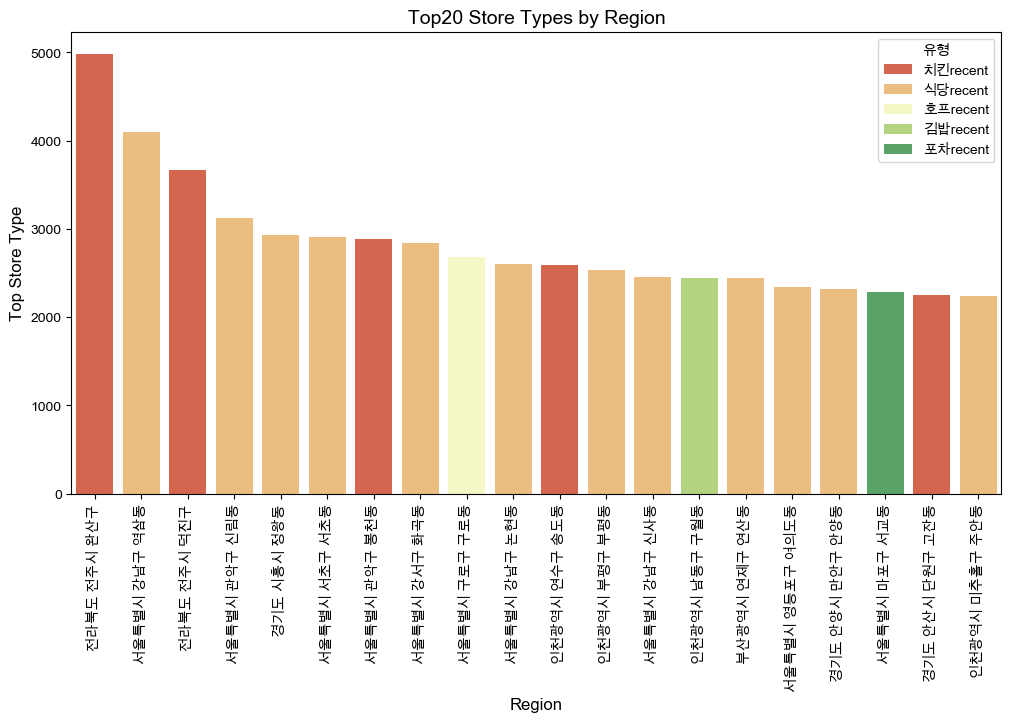

In [ ]:
get_Top20_region_store(df_Top20_region_store)

In [ ]:
df_Top20_region_store.head()

,주소,광역,시군구,읍면동,최다 가게,전체recent
0,전라북도 전주시 완산구,전라북도,전주시,완산구,치킨recent,4986.0
1,서울특별시 강남구 역삼동,서울특별시,강남구,역삼동,식당recent,4102.0
2,전라북도 전주시 덕진구,전라북도,전주시,덕진구,치킨recent,3672.0
3,서울특별시 관악구 신림동,서울특별시,관악구,신림동,식당recent,3122.0
4,경기도 시흥시 정왕동,경기도,시흥시,정왕동,식당recent,2927.0


## PCA 로테이션 하고 두 번째, 세 번째, 네 번째 주성분을 사용

In [ ]:
# '전체recent 인구당 가게 수' 컬럼 제외하고 선택
df_pca = df_pca.loc[:, df_pca.columns != '전체recent 인구당 가게 수']
df_pca.head(1)

,광역,시군구,읍면동,마라recent 인구당 가게 수,탕후루recent 인구당 가게 수,카스테라recent 인구당 가게 수,떡볶이recent 인구당 가게 수,포케recent 인구당 가게 수,양꼬치recent 인구당 가게 수,곱창recent 인구당 가게 수,...,순대recent 인구당 가게 수,냉면recent 인구당 가게 수,꼬치recent 인구당 가게 수,추어탕recent 인구당 가게 수,닭갈비recent 인구당 가게 수,오리recent 인구당 가게 수,비어recent 인구당 가게 수,아구찜recent 인구당 가게 수,한우recent 인구당 가게 수,삼겹살recent 인구당 가게 수
0,강원특별자치도,강릉시,교동,16039.0,16039.0,0.0,5346.3,0.0,10692.7,8019.5,...,4582.6,10692.7,5346.3,10692.7,3564.2,32078.0,10692.7,16039.0,4009.8,0.0


In [ ]:
from sklearn.decomposition import FactorAnalysis

# 끝에 ' 인구당 가게 수'가 들어간 컬럼들만 선택, '전체recent 인구당 가게 수'는 제외
column = [col for col in df_pca.columns if ' 인구당 가게 수' in col and col != '전체recent 인구당 가게 수']

# 모든 ' 인구당 가게 수' 컬럼이 0인 행들을 제외
df_filtered = df_pca[~(df_pca[column] == 0).all(axis=1)]

# 숫자형 데이터만 선택 (PCA는 숫자형 데이터에만 적용 가능)
df_numeric = df_filtered[column].select_dtypes(include=[float, int])

# 광역, 시군구, 읍면동 컬럼을 선택
df_metadata = df_filtered[['광역', '시군구', '읍면동']].reset_index(drop=True)

# 스케일링 (표준화)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# PCA 수행
pca = PCA(n_components=4)  # 주성분 4개로 변경
pca_result = pca.fit_transform(scaled_data)

# 로테이션 수행
fa = FactorAnalysis(n_components=4, rotation='varimax')
rotated_data = fa.fit_transform(pca_result)

# 결과를 데이터프레임으로 변환
df_pca_sub = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca_sub = pd.concat([df_metadata, df_numeric.reset_index(drop=True), df_pca_sub], axis=1)
df_pca_sub.head(1)

,광역,시군구,읍면동,마라recent 인구당 가게 수,탕후루recent 인구당 가게 수,카스테라recent 인구당 가게 수,떡볶이recent 인구당 가게 수,포케recent 인구당 가게 수,양꼬치recent 인구당 가게 수,곱창recent 인구당 가게 수,...,닭갈비recent 인구당 가게 수,오리recent 인구당 가게 수,비어recent 인구당 가게 수,아구찜recent 인구당 가게 수,한우recent 인구당 가게 수,삼겹살recent 인구당 가게 수,PC1,PC2,PC3,PC4
0,강원특별자치도,강릉시,교동,16039.0,16039.0,0.0,5346.3,0.0,10692.7,8019.5,...,3564.2,32078.0,10692.7,16039.0,4009.8,0.0,7.333094,0.504746,-2.209334,0.81688


In [ ]:
from sklearn.cluster import KMeans
# 클러스터링 함수
def get_clustering(df_pca_sub, n_clusters=4):
    # KMeans 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pca_sub[['PC1', 'PC2', 'PC3', 'PC4']])
   
    # 클러스터 결과를 데이터프레임에 추가
    df_pca_sub['Cluster'] = clusters
    return df_pca_sub

df_pca_sub = get_clustering(df_pca_sub, n_clusters=4) # n_clusters는 분석 상황에 맞춰 조정 가능
df_pca_sub.head(1)

,광역,시군구,읍면동,마라recent 인구당 가게 수,탕후루recent 인구당 가게 수,카스테라recent 인구당 가게 수,떡볶이recent 인구당 가게 수,포케recent 인구당 가게 수,양꼬치recent 인구당 가게 수,곱창recent 인구당 가게 수,...,오리recent 인구당 가게 수,비어recent 인구당 가게 수,아구찜recent 인구당 가게 수,한우recent 인구당 가게 수,삼겹살recent 인구당 가게 수,PC1,PC2,PC3,PC4,Cluster
0,강원특별자치도,강릉시,교동,16039.0,16039.0,0.0,5346.3,0.0,10692.7,8019.5,...,32078.0,10692.7,16039.0,4009.8,0.0,7.333094,0.504746,-2.209334,0.81688,3


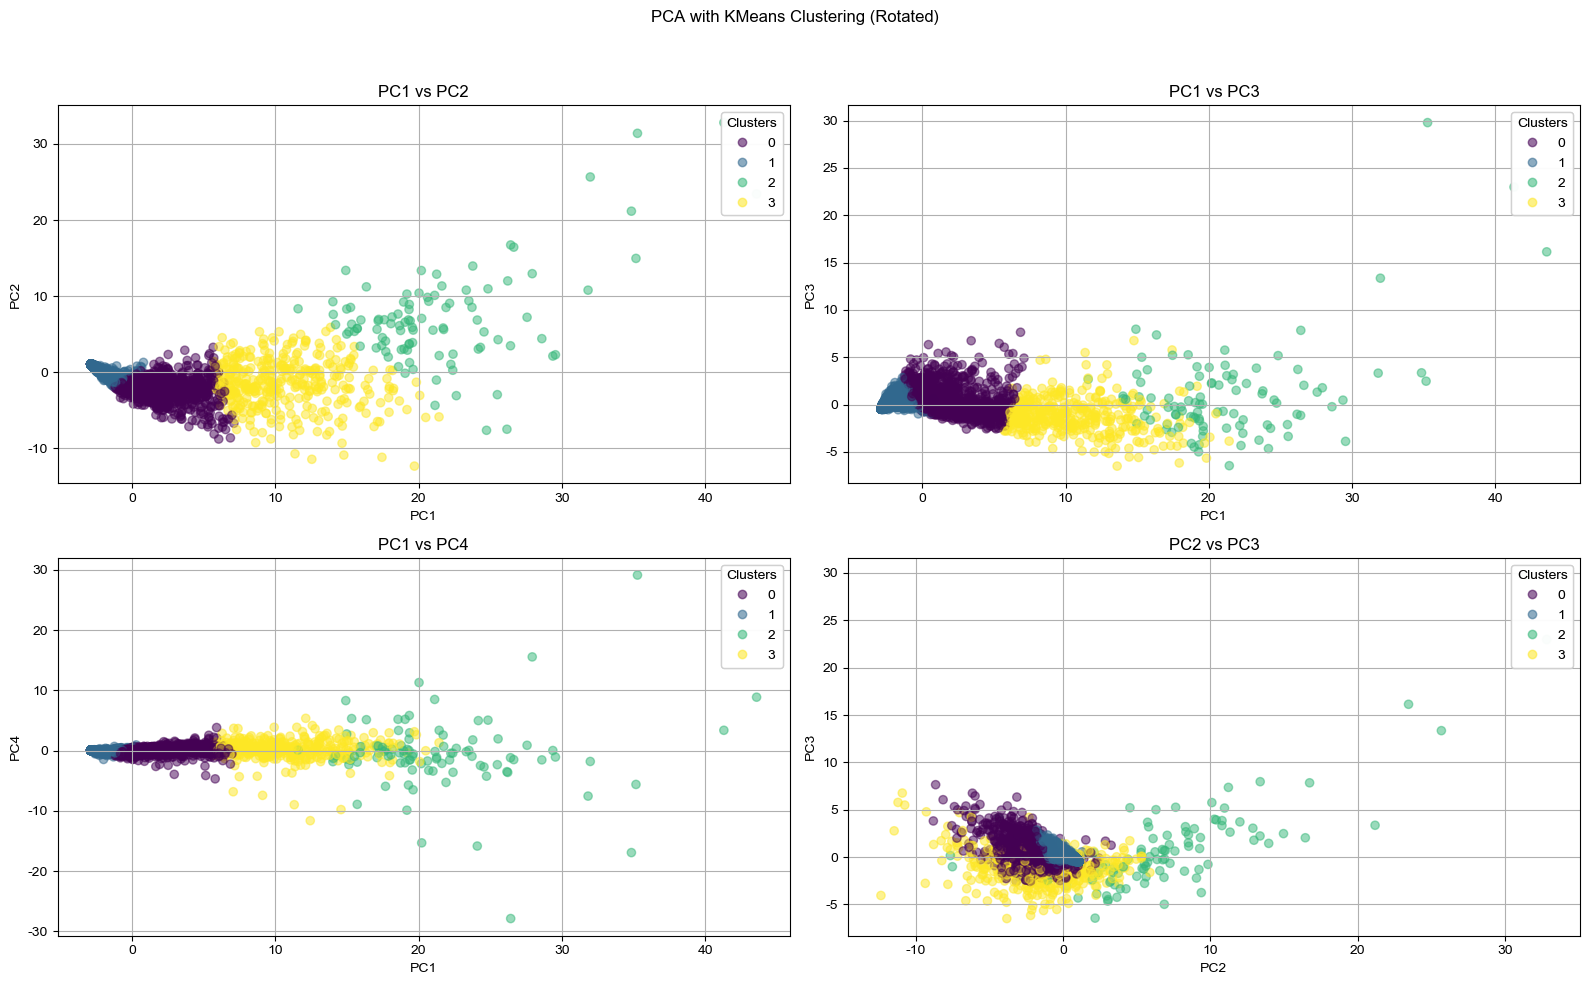

In [ ]:
# 클러스터링 시각화 함수 (4개의 주성분 조합을 포함한 시각화)
def draw_PCA_sub(df_pca_sub, columns):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    combinations = [
        ('PC1', 'PC2'),
        ('PC1', 'PC3'),
        ('PC1', 'PC4'),
        ('PC2', 'PC3')
    ]
    
    for ax, (pc_x, pc_y) in zip(axes.flat, combinations):
        scatter = ax.scatter(df_pca_sub[pc_x], df_pca_sub[pc_y], c=df_pca_sub['Cluster'], cmap='viridis', alpha=0.5)
        
        # 각 subplot에 대한 범례 추가
        legend1 = ax.legend(*scatter.legend_elements(), title='Clusters', loc='upper right')
        ax.add_artist(legend1)
        
        ax.set_xlabel(pc_x)
        ax.set_ylabel(pc_y)
        ax.set_title(f'{pc_x} vs {pc_y}')
        ax.grid(True)
    
    fig.suptitle('PCA with KMeans Clustering (Rotated)')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 끝에 ' 인구당 가게 수'가 들어간 컬럼들만 선택, '전체recent 인구당 가게 수'는 제외
column = [col for col in df_pca_sub.columns if ' 인구당 가게 수' in col and col != '전체recent 인구당 가게 수']

# 클러스터링 결과 시각화
draw_PCA_sub(df_pca_sub, column)

## 행정동과 법정동 구분(분리)

In [ ]:
# 법정동, 행정동 구분 함수 import
import PublicDataReader as pdr

# 행정동과 법정동 연결 정보 로드
connection_info = pdr.code_hdong_bdong()
connection_info.head()

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2024.2.1. 시행)


,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,법정동코드,동리명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,1100000000,서울특별시,19880423,
1,11,서울특별시,11110,종로구,1111000000,,1111000000,종로구,19880423,
2,11,서울특별시,11110,종로구,1111000000,,1111090100,창신1동,19880423,19880423
3,11,서울특별시,11110,종로구,1111000000,,1111090200,창신2동,19880423,19880423
4,11,서울특별시,11110,종로구,1111000000,,1111090300,창신3동,19880423,19880423


In [ ]:
df_all_final = pd.read_csv('전체loading2.csv', encoding='euc-kr')
df_all_final.head(2)

,광역,시군구,읍면동,성비,10대비율,20대비율,30대비율,40대비율,50대비율,추어탕recent2,...,loading10k6,loading10k7,mloading10k0,mloading10k1,mloading10k2,mloading10k3,mloading10k4,mloading10k5,mloading10k6,mloading10k7
0,강원특별자치도,강릉시,강동면,1.122960,0.033829,0.072783,0.061251,0.089441,0.170682,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원특별자치도,강릉시,강문동,1.387755,0.042735,0.115385,0.136752,0.089744,0.128205,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 법정동과 행정동 분리 하는 함수, 먄약 법정동과 행정동의 이름이 같은 지역이 있을 경우 행정동 컬럼에는 법정동 컬럼의 데이터와 같은 데이터 할당
def separate_and_mark(df, connection_info):
    def get_adong_bdong(row, connection_info):
        matching_row = connection_info[
            (connection_info['동리명'] == row['읍면동']) & 
            (connection_info['시군구명'] == row['시군구']) & 
            (connection_info['시도명'] == row['광역'])
        ]
        if not matching_row.empty:
            bdong = matching_row.iloc[0]['동리명']
            adong = matching_row.iloc[0]['읍면동명']
            if bdong == adong:
                return bdong, bdong
            return bdong, adong
        return row['읍면동'], None

    df[['법정동', '행정동']] = df.apply(
        lambda row: pd.Series(get_adong_bdong(row, connection_info)), axis=1
    )
    return df

In [ ]:
# 기존 데이터프레임에 함수 적용
df_all_final = separate_and_mark(df_all_final, connection_info)

# 컬럼 순서 재배치
cols = list(df_all_final.columns)
cols.insert(cols.index('읍면동') + 1, cols.pop(cols.index('법정동')))
cols.insert(cols.index('읍면동') + 2, cols.pop(cols.index('행정동')))
df_all_final = df_all_final[cols]

df_all_final.head()

,광역,시군구,읍면동,법정동,행정동,성비,10대비율,20대비율,30대비율,40대비율,...,loading10k6,loading10k7,mloading10k0,mloading10k1,mloading10k2,mloading10k3,mloading10k4,mloading10k5,mloading10k6,mloading10k7
0,강원특별자치도,강릉시,강동면,강동면,강동면,1.122960,0.033829,0.072783,0.061251,0.089441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원특별자치도,강릉시,강문동,강문동,초당동,1.387755,0.042735,0.115385,0.136752,0.089744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강원특별자치도,강릉시,견소동,견소동,송정동,0.968108,0.097227,0.084624,0.120994,0.151602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,강원특별자치도,강릉시,교동,교동,교1동,0.958005,0.095299,0.128499,0.095143,0.144616,...,0.516826,-0.477762,-0.686623,-0.710781,0.182117,0.609998,-0.174328,-0.369117,0.162649,0.708711
4,강원특별자치도,강릉시,구정면,구정면,구정면,1.028795,0.061823,0.069762,0.061102,0.111378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 읍면동 컬럼을 제외한 나머지 컬럼들을 선택
df_all_final = df_all_final.drop(columns=['읍면동'])
df_all_final.tail()

,광역,시군구,법정동,행정동,성비,10대비율,20대비율,30대비율,40대비율,50대비율,...,loading10k6,loading10k7,mloading10k0,mloading10k1,mloading10k2,mloading10k3,mloading10k4,mloading10k5,mloading10k6,mloading10k7
4749,충청북도,충주시,충의동,성내.충인동,0.970414,0.042042,0.069069,0.066066,0.093093,0.141141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4750,충청북도,충주시,충인동,성내.충인동,0.926966,0.040816,0.081633,0.058309,0.087464,0.192420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4751,충청북도,충주시,칠금동,칠금.금능동,0.960695,0.116063,0.118644,0.091026,0.148757,0.211563,...,0.227224,-1.382679,0.293434,0.083785,1.369333,0.716769,-0.480919,0.393800,-0.720172,2.569946
4752,충청북도,충주시,풍동,단월.풍.가주동,1.307116,0.030844,0.077922,0.047078,0.081169,0.230519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4753,충청북도,충주시,호암동,호암.직동,0.993632,0.122661,0.118874,0.161267,0.180524,0.152460,...,-1.338708,0.209535,-1.319370,1.612656,0.320530,-0.038729,0.183206,-1.426076,-0.325324,1.107559


# 변수 데이터 취합

In [ ]:
df_infra = pd.read_csv('[수정 전]지역별 인프라.csv', index_col=0, encoding='euc-kr')
# 필요 컬럼만 추출
data = [
       '시도명', '시군구명', '읍면동명','초중고_개수','대학교_개수', 
       '지하철_개수', '관광지_개수', '학원및교습소_개수', '학원및교습소_정원합계_2024']

df_infra = df_infra[data]
df_infra.rename(columns={'시도명':'광역', '시군구명':'시군구', '읍면동명':'읍면동'}, inplace=True)
# 시도명 컬럼의 지역 이름 변경 ex: 경기 > 경기도
area = {
    '강원':'강원특별자치도', '경기':'경기도', '경남':'경상남도', '경북':'경상북도',
    '광주':'광주광역시', '대구':'대구광역시', '대전':'대전광역시', '부산':'부산광역시', 
    '서울':'서울특별시', '세종':'세종특별자치시', '울산':'울산광역시','인천':'인천광역시',
    '전남':'전라남도', '전북':'전라북도', '제주':'제주특별자치도', '충남':'충청남도', '충북':'충청북도'
}

df_infra['광역'] = df_infra['광역'].replace(area)
df_infra.head()

,광역,시군구,읍면동,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수,학원및교습소_정원합계_2024
0,강원특별자치도,강릉시,강동면,3,0,0,2,0,0
1,강원특별자치도,강릉시,구정면,3,0,0,0,0,0
2,강원특별자치도,강릉시,내곡동,1,1,0,0,23,0
3,강원특별자치도,강릉시,사천면,3,0,0,0,0,0
4,강원특별자치도,강릉시,성산면,2,0,0,2,0,0


In [ ]:
# 기존 데이터프레임에 함수 적용
df_infra = separate_and_mark(df_infra, connection_info)

# 컬럼 순서 재배치
cols = list(df_infra.columns)
cols.insert(cols.index('읍면동') + 1, cols.pop(cols.index('법정동')))
cols.insert(cols.index('읍면동') + 2, cols.pop(cols.index('행정동')))
df_infra = df_infra[cols]

# '읍면동', '학원및교습소_정원합계_2024' 컬럼을 제외한 나머지 컬럼들을 선택
df_infra = df_infra.drop(columns=['읍면동', '학원및교습소_정원합계_2024'])

df_infra.tail()

,광역,시군구,법정동,행정동,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수
1481,충청북도,충주시,연수동,연수동,3,0,0,0,116
1482,충청북도,충주시,용산동,용산동,4,0,0,0,63
1483,충청북도,충주시,주덕읍,주덕읍,3,0,0,0,0
1484,충청북도,충주시,중앙탑면,중앙탑면,4,0,0,1,0
1485,충청북도,충주시,지현동,지현동,0,0,0,0,12


In [ ]:
# 법정동과 행정동이 다른 행만 확인(잘 분리 됐는지 확인)
different_df = df_infra[df_infra['법정동'] != df_infra['행정동']]
different_df

,광역,시군구,법정동,행정동,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수
19,강원특별자치도,동해시,발한동,동호동,6,0,0,0,7
40,강원특별자치도,속초시,대포동,청호동,1,0,0,0,0
41,강원특별자치도,속초시,동명동,영랑동,0,0,0,0,3
69,강원특별자치도,원주시,단구동,개운동,7,0,0,0,124
72,강원특별자치도,원주시,봉산동,태장1동,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...
1191,전라남도,목포시,옥암동,삼향동,11,0,0,0,127
1194,전라남도,목포시,죽교동,북교동,6,1,0,2,3
1453,충청북도,제천시,신백동,동현동,4,0,0,0,17
1457,충청북도,제천시,화산동,화산1동,1,0,0,0,5


In [ ]:
df_movie = pd.read_csv('[원본]지역별 영화관 극장수.csv', index_col=0, encoding='euc-kr')
# NaN 값을 제외한 모든 데이터 가져오기
df_movie = df_movie.dropna()

In [ ]:
df_movie.isna().sum()

brand         0
시도명           0
시군구명          0
읍면동명          0
극장명           0
주소            0
CGV 극장 수      0
롯데시네마 극장 수    0
메가박스 극장 수     0
총 영화관 수       0
dtype: int64

In [ ]:
data = [
    '시도명', '시군구명', '읍면동명', 'CGV 극장 수', 
    '롯데시네마 극장 수', '메가박스 극장 수', '총 영화관 수']
df_movie = df_movie[data]

df_movie.rename(columns={'시도명':'광역', '시군구명':'시군구', '읍면동명':'읍면동'}, inplace=True)

# 시도명 컬럼의 지역 이름 변경 ex: 경기 > 경기도
area = {
    '강원':'강원특별자치도', '경기':'경기도', '경남':'경상남도', '경북':'경상북도',
    '광주':'광주광역시', '대구':'대구광역시', '대전':'대전광역시', '부산':'부산광역시', 
    '서울':'서울특별시', '세종':'세종특별자치시', '울산':'울산광역시','인천':'인천광역시',
    '전남':'전라남도', '전북':'전라북도', '제주':'제주특별자치도', '충남':'충청남도', '충북':'충청북도'
}

df_movie['광역'] = df_movie['광역'].replace(area)

# 기존 데이터프레임에 함수 적용
df_movie = separate_and_mark(df_movie, connection_info)

# 컬럼 순서 재배치
cols = list(df_movie.columns)
cols.insert(cols.index('읍면동') + 1, cols.pop(cols.index('법정동')))
cols.insert(cols.index('읍면동') + 2, cols.pop(cols.index('행정동')))
df_movie = df_movie[cols]

# 읍면동 컬럼을 제외한 나머지 컬럼들을 선택
df_movie = df_movie.drop(columns=['읍면동'])
df_movie.tail()

,광역,시군구,법정동,행정동,CGV 극장 수,롯데시네마 극장 수,메가박스 극장 수,총 영화관 수
459,충청남도,홍성군,홍북읍,홍북읍,1,0,1,2
460,충청북도,청원군,오창읍,오창읍,0,0,1,1
461,충청북도,청주시 서원구,사창동,사창동,0,0,1,1
463,충청북도,충주시,연수동,연수동,1,1,1,3
464,충청북도,진천군,진천읍,진천읍,0,0,1,1


In [ ]:
# 법정동과 행정동이 다른 행만 확인(잘 분리 됐는지 확인)
different_df = df_movie[df_movie['법정동'] != df_movie['행정동']]
different_df

,광역,시군구,법정동,행정동,CGV 극장 수,롯데시네마 극장 수,메가박스 극장 수,총 영화관 수
6,경기도,용인시 처인구,역북동,역삼동,2,1,0,3
7,경기도,부천시 원미구,심곡동,심곡1동,2,2,0,4
8,경기도,안양시 동안구,관양동,관양1동,2,3,0,5
9,경기도,안양시 동안구,호계동,호계1동,2,3,0,5
10,경기도,부천시,괴안동,,3,0,1,4
...,...,...,...,...,...,...,...,...
453,제주특별자치도,서귀포시,동홍동,송산동,0,1,1,2
454,제주특별자치도,제주시,아라일동,아라동,2,1,2,5
455,제주특별자치도,제주시,삼양이동,삼양동,2,1,2,5
456,충청남도,천안시 서북구,두정동,부성동,2,1,1,4


In [ ]:
# df_income = pd.read_csv('전국 시군구 단위 평균소득_with sejong.csv', index_col=0, encoding='euc-kr')
# df_income.sort_values(by='평균소득금액', ascending=False, inplace=True)
# df_income.rename(columns={'시군구명':'시군구'}, inplace=True)




# df_income.head()

In [ ]:
# 변수 데이터 병합
df_infra = pd.merge(df_infra, df_movie, on=['광역', '시군구', '법정동', '행정동'], how='inner')
# 필요한 컬럼들만 선택하여 int형으로 변환
data = ['CGV 극장 수', '롯데시네마 극장 수', '메가박스 극장 수']
df_infra[data] = df_infra[data].astype(int)
df_infra.head()

,광역,시군구,법정동,행정동,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수,CGV 극장 수,롯데시네마 극장 수,메가박스 극장 수,총 영화관 수
0,강원특별자치도,강릉시,옥천동,옥천동,2,1,0,0,41,1,0,0,1
1,강원특별자치도,동해시,천곡동,천곡동,6,0,0,0,68,0,1,0,1
2,강원특별자치도,속초시,조양동,조양동,5,0,0,2,1,0,0,1,1
3,강원특별자치도,원주시,단계동,단계동,10,0,0,0,1,1,2,2,5
4,강원특별자치도,원주시,단계동,단계동,10,0,0,0,1,1,2,2,5


In [ ]:
df_infra.tail()

,광역,시군구,법정동,행정동,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수,CGV 극장 수,롯데시네마 극장 수,메가박스 극장 수,총 영화관 수
105,전라남도,순천시,해룡면,해룡면,0,0,0,0,0,2,0,1,3
106,전라남도,순천시,해룡면,해룡면,0,0,0,0,0,2,0,1,3
107,충청북도,음성군,맹동면,맹동면,3,0,0,0,0,1,0,0,1
108,충청북도,진천군,진천읍,진천읍,8,0,0,0,0,0,0,1,1
109,충청북도,충주시,연수동,연수동,3,0,0,0,116,1,1,1,3


# 최종 데이터 병합

In [ ]:
df_all_final.head()

,광역,시군구,법정동,행정동,성비,10대비율,20대비율,30대비율,40대비율,50대비율,...,loading10k6,loading10k7,mloading10k0,mloading10k1,mloading10k2,mloading10k3,mloading10k4,mloading10k5,mloading10k6,mloading10k7
0,강원특별자치도,강릉시,강동면,강동면,1.122960,0.033829,0.072783,0.061251,0.089441,0.170682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원특별자치도,강릉시,강문동,초당동,1.387755,0.042735,0.115385,0.136752,0.089744,0.128205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강원특별자치도,강릉시,견소동,송정동,0.968108,0.097227,0.084624,0.120994,0.151602,0.186892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,강원특별자치도,강릉시,교동,교1동,0.958005,0.095299,0.128499,0.095143,0.144616,0.186389,...,0.516826,-0.477762,-0.686623,-0.710781,0.182117,0.609998,-0.174328,-0.369117,0.162649,0.708711
4,강원특별자치도,강릉시,구정면,구정면,1.028795,0.061823,0.069762,0.061102,0.111378,0.174886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_infra.head()

,광역,시군구,법정동,행정동,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수,CGV 극장 수,롯데시네마 극장 수,메가박스 극장 수,총 영화관 수
0,강원특별자치도,강릉시,옥천동,옥천동,2,1,0,0,41,1,0,0,1
1,강원특별자치도,동해시,천곡동,천곡동,6,0,0,0,68,0,1,0,1
2,강원특별자치도,속초시,조양동,조양동,5,0,0,2,1,0,0,1,1
3,강원특별자치도,원주시,단계동,단계동,10,0,0,0,1,1,2,2,5
4,강원특별자치도,원주시,단계동,단계동,10,0,0,0,1,1,2,2,5


In [ ]:
# 두 데이터 취합
df = pd.merge(df_all_final, df_infra, on=['광역', '시군구', '법정동', '행정동'], how='left').fillna(0)
df.head()

,광역,시군구,법정동,행정동,성비,10대비율,20대비율,30대비율,40대비율,50대비율,...,mloading10k7,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수,CGV 극장 수,롯데시네마 극장 수,메가박스 극장 수,총 영화관 수
0,강원특별자치도,강릉시,강동면,강동면,1.122960,0.033829,0.072783,0.061251,0.089441,0.170682,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,강원특별자치도,강릉시,강문동,초당동,1.387755,0.042735,0.115385,0.136752,0.089744,0.128205,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,강원특별자치도,강릉시,견소동,송정동,0.968108,0.097227,0.084624,0.120994,0.151602,0.186892,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,강원특별자치도,강릉시,교동,교1동,0.958005,0.095299,0.128499,0.095143,0.144616,0.186389,...,0.708711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,강원특별자치도,강릉시,구정면,구정면,1.028795,0.061823,0.069762,0.061102,0.111378,0.174886,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = [
    '초중고_개수', '대학교_개수', '지하철_개수', 
    '관광지_개수', '학원및교습소_개수', 
    'CGV 극장 수', '롯데시네마 극장 수', '메가박스 극장 수', '총 영화관 수'
]

df[data] = df[data].fillna(0).astype(int)
df.head()

,광역,시군구,법정동,행정동,성비,10대비율,20대비율,30대비율,40대비율,50대비율,...,mloading10k7,초중고_개수,대학교_개수,지하철_개수,관광지_개수,학원및교습소_개수,CGV 극장 수,롯데시네마 극장 수,메가박스 극장 수,총 영화관 수
0,강원특별자치도,강릉시,강동면,강동면,1.122960,0.033829,0.072783,0.061251,0.089441,0.170682,...,0.000000,0,0,0,0,0,0,0,0,0
1,강원특별자치도,강릉시,강문동,초당동,1.387755,0.042735,0.115385,0.136752,0.089744,0.128205,...,0.000000,0,0,0,0,0,0,0,0,0
2,강원특별자치도,강릉시,견소동,송정동,0.968108,0.097227,0.084624,0.120994,0.151602,0.186892,...,0.000000,0,0,0,0,0,0,0,0,0
3,강원특별자치도,강릉시,교동,교1동,0.958005,0.095299,0.128499,0.095143,0.144616,0.186389,...,0.708711,0,0,0,0,0,0,0,0,0
4,강원특별자치도,강릉시,구정면,구정면,1.028795,0.061823,0.069762,0.061102,0.111378,0.174886,...,0.000000,0,0,0,0,0,0,0,0,0


In [ ]:
df.isna().sum()

광역            0
시군구           0
법정동           0
행정동           0
성비            0
             ..
학원및교습소_개수     0
CGV 극장 수      0
롯데시네마 극장 수    0
메가박스 극장 수     0
총 영화관 수       0
Length: 561, dtype: int64

In [ ]:
# 저장
df.to_csv('[최종]final.csv', encoding='euc-kr')